## Install Packages

In [109]:
#pip install pydealer

## Import Packages

In [110]:
import pydealer
import random
import bisect

## Deck and Hand Creation

In [111]:
deck = pydealer.Deck()
deck.shuffle()

newDeck = []

for i in deck:
  newDeck.append(i.value)

user_hand = random.sample(newDeck, 7)

for i in user_hand:
  newDeck.remove(i)

agent_hand = random.sample(newDeck, 7)

for i in agent_hand:
  newDeck.remove(i)

## Variable Checks

In [112]:
# To ensure that user starts first
isUserTurn = False

# To ensure that the user/agent cannot call bluff on his own cards when one of them choses to pass
catchSelfBluff = False

# When the a new round starts
newRound = True

# To ensure that after two passes a new round starts
twoPasses = 2

# To keep a track of all the cards in the pile for each round
pile_cards = []

# To keep a track of only the most recently played cards
top_cards = []

# To keep a track of the rank called for the current round
current_round_rank = ""

# To keep a track of wether you are implementing strategy in the current round
strategy = False

# To keep a track of the current step of strategy ( strategy has 2 steps )
strategy_step = 1

# To keep a track of the last play of a round
last_play = False

# To keep a track of whether the game is completed or not
game_completed = False



## Exception Handing for Input

In [113]:
def safe_int_input(text):
  while True:
    try:
      return int(input(text))
    except:
      print("Invalid input. Please enter an integer.")

## Removing Cards Functions

In [114]:
def remove(hand, top_cards , pile_cards, maxFreqRank, maxFreqRankCount):

  index_to_remove = []

  for index,value in enumerate(hand):
    if(value == maxFreqRank):
      index_to_remove.append(index)

  for index in reversed(index_to_remove):
    pile_cards.append(hand[index])
    top_cards.append(hand[index])
    hand.pop(index)

## Removing Random Cards Function

In [115]:
def remove_random(hand, top_cards , pile_cards, newRound, current_round_rank, maxFreqRankCount):

  total_cards_removed = 0
  index_to_remove = []

  current_round_rank_cards = []


  for index,value in enumerate(hand):
    if(value == current_round_rank):
      current_round_rank_cards.append(value)
      hand.pop(index)

  while(total_cards_removed != maxFreqRankCount):

    minFreqRank = min(hand, key=hand.count)
    minFreqRankCount = hand.count(minFreqRank)

    for index,value in enumerate(hand):
      if(value == minFreqRank):
        index_to_remove.append(index)


    for index in reversed(index_to_remove):
      pile_cards.append(hand[index])
      top_cards.append(hand[index])
      hand.pop(index)
      total_cards_removed += 1

      if(total_cards_removed == maxFreqRankCount):
        break

    index_to_remove = []

  for value in current_round_rank_cards:
    hand.append(value)

## Honesty Function

In [116]:
def honesty(hand, top_cards, pile_cards, newRound, current_round_rank):

  if(newRound):
    maxFreqRank = max(hand, key=hand.count)
    maxFreqRankCount = hand.count(maxFreqRank)

  else:
    maxFreqRank = current_round_rank
    maxFreqRankCount = hand.count(maxFreqRank)

  remove(hand, top_cards , pile_cards, maxFreqRank, maxFreqRankCount)

  if(newRound):
    print("\nAgent called ", maxFreqRankCount, " of ", maxFreqRank)
  else:
    print("\nAgent added more ", maxFreqRankCount, " of ", maxFreqRank)

  return maxFreqRank, maxFreqRankCount

## Strategize Function

In [117]:
def strategize(hand, top_cards, pile_cards, newRound, current_round_rank, strategy, strategy_step):

  if(newRound and strategy_step == 1):
    maxFreqRank = max(hand, key=hand.count)

    length_of_hand = len(hand) - hand.count(maxFreqRank)

    if(length_of_hand == 1):
      maxFreqRankCount = 1
    else:
      maxFreqRankCount = random.randint(1,2)

    remove_random(hand, top_cards , pile_cards, newRound, maxFreqRank, maxFreqRankCount)
    print("\nAgent called ", maxFreqRankCount, " of ", maxFreqRank)
    strategy = True
    strategy_step += 1

  elif(not newRound and strategy_step == 1):
    maxFreqRank = current_round_rank

    length_of_hand = len(hand) - hand.count(maxFreqRank)

    if(length_of_hand == 1):
      maxFreqRankCount = 1
    else:
      maxFreqRankCount = random.randint(1,2)

    remove_random(hand, top_cards , pile_cards, newRound, current_round_rank, maxFreqRankCount)
    print("\nAgent added more ", maxFreqRankCount, " of ", maxFreqRank)
    strategy = True
    strategy_step += 1

  elif(strategy_step == 2):
    maxFreqRank = current_round_rank
    maxFreqRankCount = hand.count(maxFreqRank)
    remove(hand, top_cards , pile_cards, maxFreqRank, maxFreqRankCount)
    print("\nAgent added more ", maxFreqRankCount, " of ", maxFreqRank)
    strategy = False
    strategy_step = 0


  return maxFreqRank, maxFreqRankCount, strategy, strategy_step

## Lies Function

In [118]:
def lies(hand, top_cards, pile_cards, current_round_rank):

  maxFreqRank = current_round_rank
  maxFreqRankCount = random.randint(1,2)

  remove_random(hand, top_cards , pile_cards, False, current_round_rank, maxFreqRankCount)

  print("\nAgent added more ", maxFreqRankCount, " of ", maxFreqRank)

  return maxFreqRank, maxFreqRankCount

## Print User Options



In [119]:
def printHand(hand):
  print("\nYour hand ( ", len(hand),  " cards ): \n")

  for index, value in enumerate(hand):
    print("Index ", index, " -> ", value)

## User Input for Calling Cards

In [120]:
def user_calls_cards(hand, top_cards, pile_cards, newRound, current_round_rank):

  printHand(hand)

  maxFreqRank = current_round_rank

  if(newRound):
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    maxFreqRank = input("\nEnter the rank of the card (first letter capital): ")

    while maxFreqRank not in ranks:
      print("\nWrong Card Rank")
      print("\nAvailable Ranks -> ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']")
      maxFreqRank = input()

  maxFreqRankCount = safe_int_input("\nEnter the total number to call: ")

  while maxFreqRankCount <= 0:
    print("\nNumber can't be less than 1")
    maxFreqRankCount = safe_int_input("\nEnter the total number to call: ")

  index_to_remove = []

  while len(index_to_remove) != maxFreqRankCount:
    selected_index = safe_int_input("\nEnter the index of the cards you want to chose for the call: ")
    if(selected_index < 0 or selected_index > len(hand) - 1 or selected_index in index_to_remove):
      print("\nTry Again")
    else:
      index_to_remove.append(selected_index)

  index_to_remove.sort()

  for index in reversed(index_to_remove):
    pile_cards.append(hand[index])
    top_cards.append(hand[index])
    hand.pop(index)

  if(newRound):
    print("\nUser called ",maxFreqRankCount, " of ", maxFreqRank, "'s")
  else:
    print("\nUser added more ",maxFreqRankCount, " of ", maxFreqRank, "'s")

  return maxFreqRank, maxFreqRankCount

## Probabilistic decision making for calling a bluff

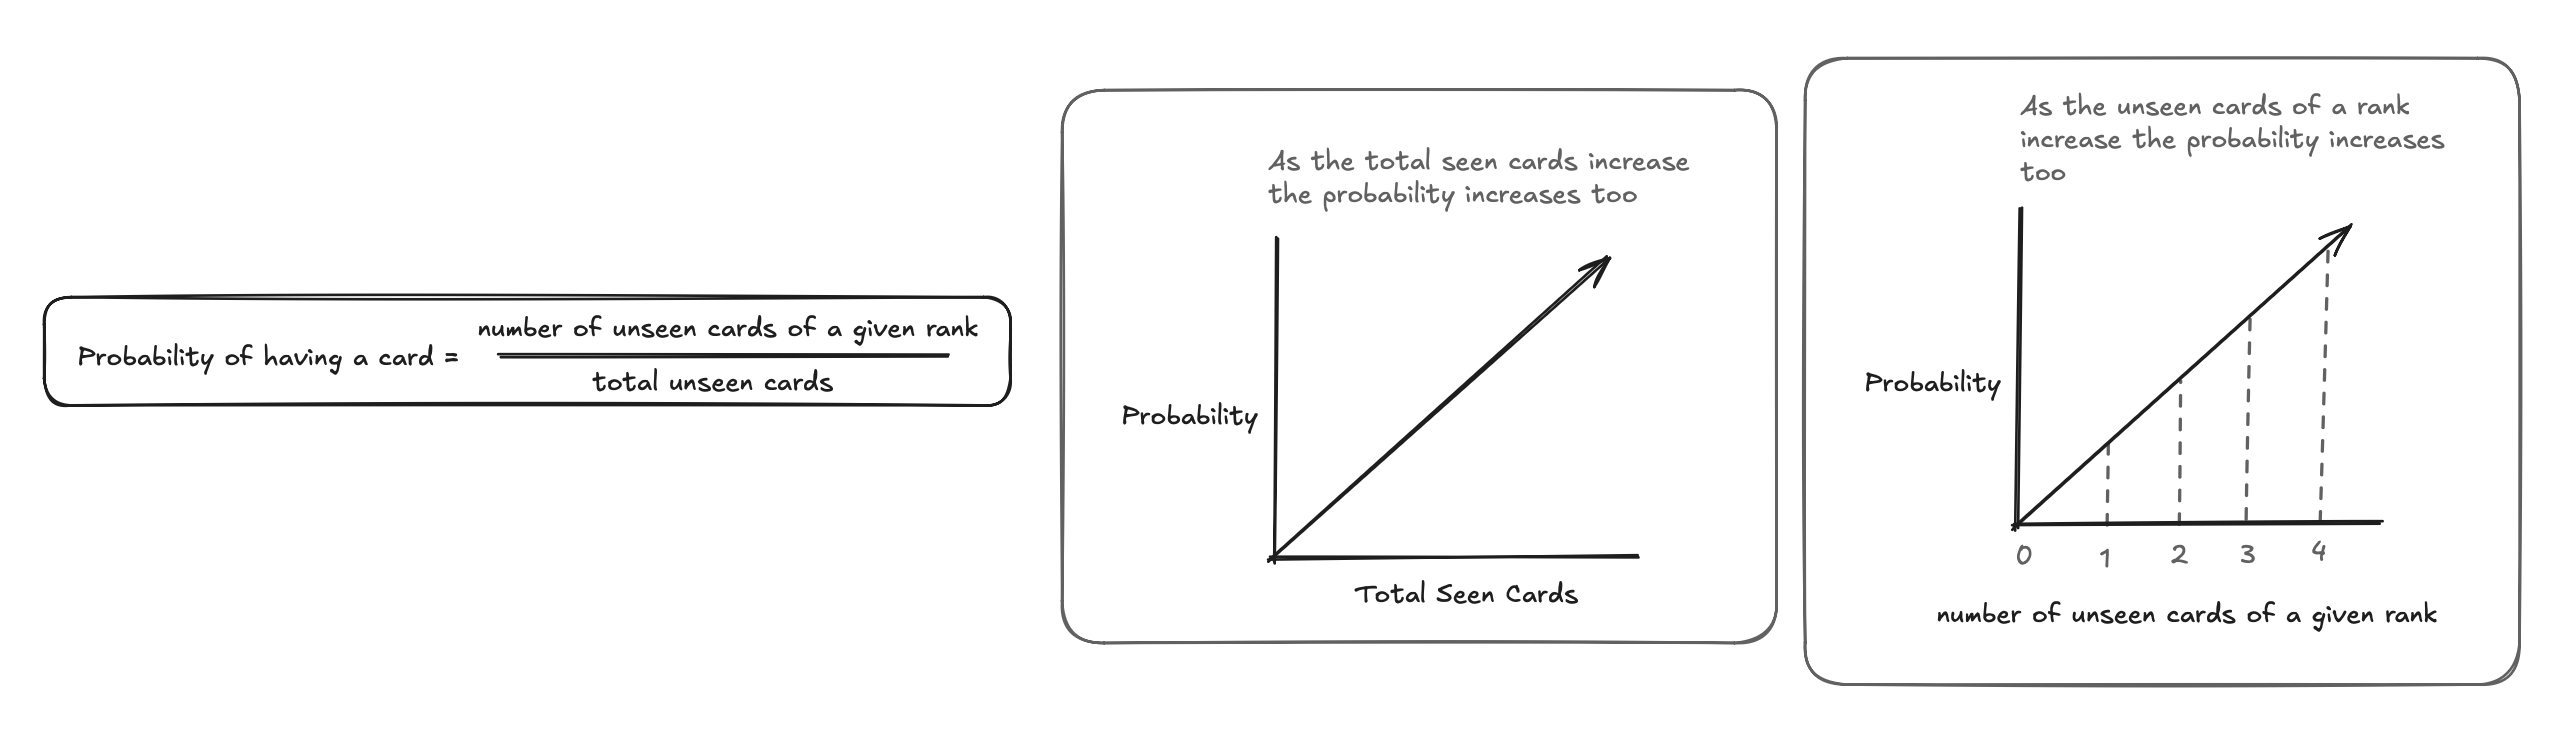

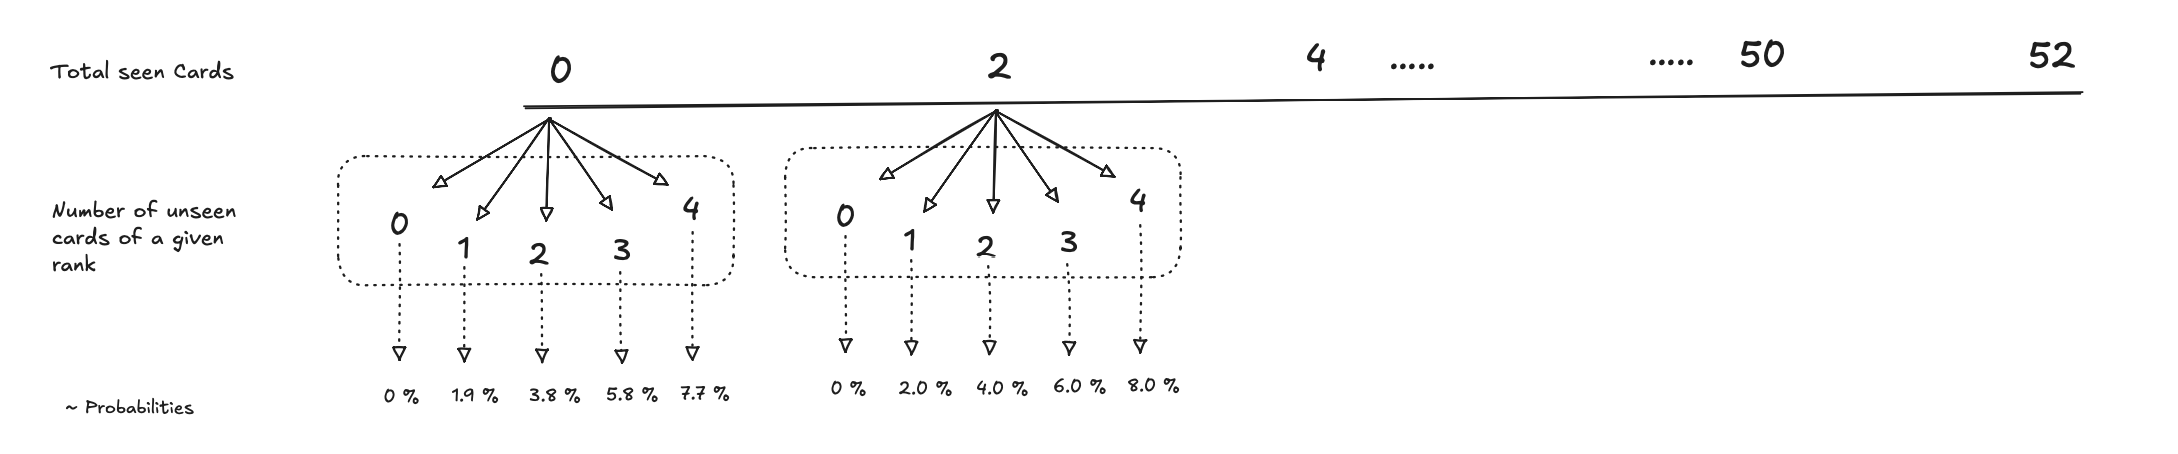

The probability is dependent on two factors which is the '*total seen cards*' and the '*number of unseen cards of a given rank*'

So in order to create a dynamic threshold we divide the '*total seen cards*' into ranges and for each range we precompute the probability for each value of the '*number of unseen cards of a given rank*'

During gameplay, the agent finds the two nearest buckets around the current seen card count, interpolates between their baseline probabilities to form a threshold, and compares the actual probability of the claim against it.

If the actual probability is lower than the threshold, the agent calls bluff else if it is higher, the agent treats the claim as plausible and does not call bluff.

In [121]:
# In order to implement the probabilistic decision making
probability_table = {
    0:  {0: 0.00, 1: 1.90, 2: 3.80, 3: 5.80, 4: 7.70},
    2:  {0: 0.00, 1: 2.00, 2: 4.00, 3: 6.00, 4: 8.00},
    4:  {0: 0.00, 1: 2.10, 2: 4.20, 3: 6.20, 4: 8.30},
    6:  {0: 0.00, 1: 2.20, 2: 4.40, 3: 6.70, 4: 8.90},
    8:  {0: 0.00, 1: 2.30, 2: 4.50, 3: 6.80, 4: 9.10},
    10: {0: 0.00, 1: 2.40, 2: 4.80, 3: 7.10, 4: 9.50},
    12: {0: 0.00, 1: 2.50, 2: 5.00, 3: 7.50, 4: 10.00},
    14: {0: 0.00, 1: 2.60, 2: 5.30, 3: 7.90, 4: 10.50},
    16: {0: 0.00, 1: 2.80, 2: 5.60, 3: 8.30, 4: 11.10},
    18: {0: 0.00, 1: 2.90, 2: 5.90, 3: 8.80, 4: 11.80},
    20: {0: 0.00, 1: 3.10, 2: 6.20, 3: 9.40, 4: 12.50},
    22: {0: 0.00, 1: 3.30, 2: 6.70, 3: 10.00, 4: 13.30},
    24: {0: 0.00, 1: 3.60, 2: 7.10, 3: 10.70, 4: 14.30},
    26: {0: 0.00, 1: 3.80, 2: 7.70, 3: 11.50, 4: 15.40},
    28: {0: 0.00, 1: 4.20, 2: 8.30, 3: 12.50, 4: 16.70},
    30: {0: 0.00, 1: 4.00, 2: 8.00, 3: 12.00, 4: 16.00},
    32: {0: 0.00, 1: 5.00, 2: 10.00, 3: 15.00, 4: 20.00},
    34: {0: 0.00, 1: 5.60, 2: 11.10, 3: 16.70, 4: 22.20},
    36: {0: 0.00, 1: 6.20, 2: 12.50, 3: 18.80, 4: 25.00},
    38: {0: 0.00, 1: 7.10, 2: 14.30, 3: 21.40, 4: 28.60},
    40: {0: 0.00, 1: 8.30, 2: 16.70, 3: 25.00, 4: 33.30},
    42: {0: 0.00, 1: 10.00, 2: 20.00, 3: 30.00, 4: 40.00},
    44: {0: 0.00, 1: 12.50, 2: 25.00, 3: 37.50, 4: 50.00},
    46: {0: 0.00, 1: 16.70, 2: 33.30, 3: 50.00, 4: 66.70},
    48: {0: 0.00, 1: 25.00, 2: 50.00, 3: 75.00, 4: 100.00},
    50: {0: 0.00, 1: 50.00, 2: 100.00, 3: 150.00, 4: 200.00},
    52: {0: 0.00, 1: 0.00, 2: 0.00, 3: 0.00, 4: 0.00}
}

In [122]:
def probabilistic_decision_making(total_seen_cards, probability_table, current_round_rank):

  total_unseen_cards = 52 - len(total_seen_cards)
  unseen_cards_of_a_rank = 4 - total_seen_cards.count(current_round_rank)

  nums_bucket = [ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50 ]

  left_index = bisect.bisect_left(nums_bucket, len(total_seen_cards)) - 1

  if left_index < 0:
    left_index = 0

  right_index = left_index + 1

  left_range = nums_bucket[left_index]
  if right_index >= len(nums_bucket):
    right_range = 52
  else:
    right_range = nums_bucket[right_index]

  threshold = round((probability_table[left_range][unseen_cards_of_a_rank] + probability_table[right_range][unseen_cards_of_a_rank])/2 , 2)
  percentage = round((unseen_cards_of_a_rank/total_unseen_cards)*100 , 2)

  # 0 -> call bluff, 1 -> do not call bluff

  if(percentage == 0 and threshold == 0):
    option = 0
  else:
    option = 0 if percentage <= threshold else 1

  return option

## Calling Function

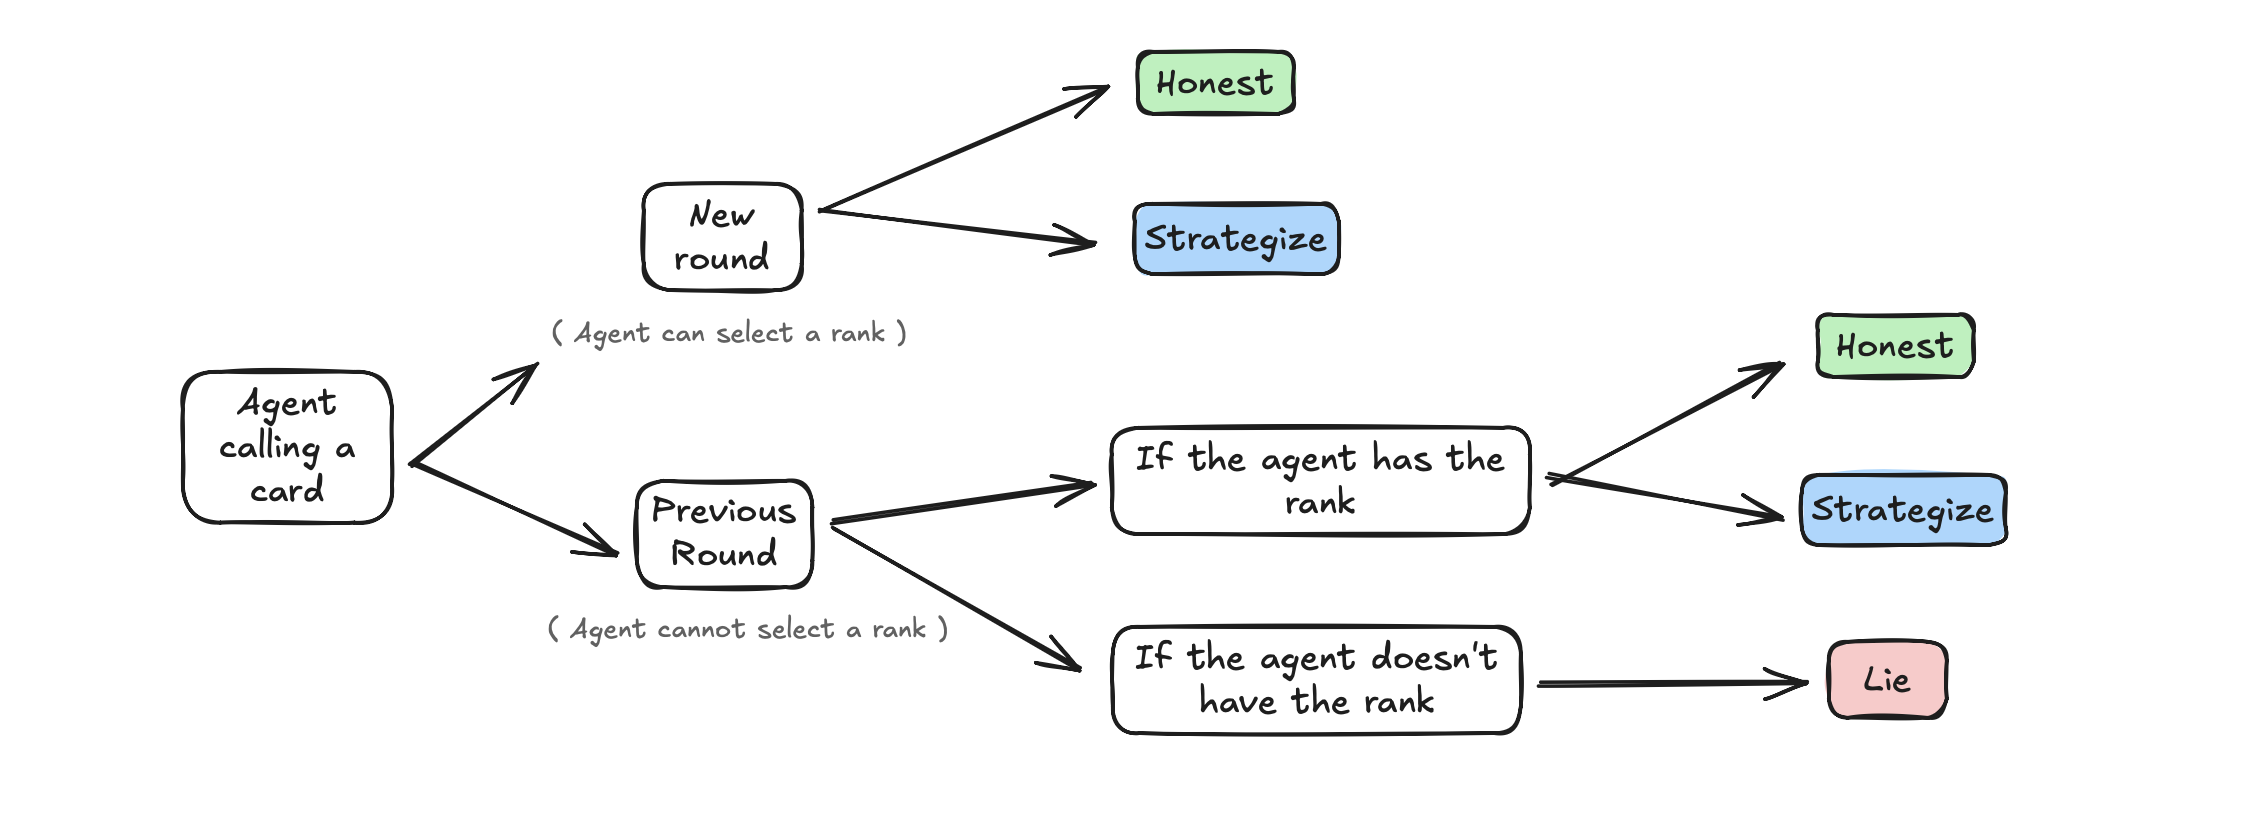

In [123]:
def calling(hand, top_cards, pile_cards, isUserTurn, newRound, current_round_rank, strategy, strategy_step):

  if(isUserTurn and newRound):
    print("\nUser chose to play")
  elif(isUserTurn and not newRound):
    print("\nUser chose to continue playing")
  elif(not isUserTurn and newRound):
    print("\nAgent chose to play")
  else:
    print("\nAgent chose to continue playing")

  top_cards.clear()

  if(isUserTurn):
    maxFreqRank, maxFreqRankCount = user_calls_cards(hand, top_cards, pile_cards, newRound, current_round_rank)

    if(not newRound):
      maxFreqRank = current_round_rank

  else:
    if(strategy):
      print("Agent chose to strategize - 1")
      maxFreqRank, maxFreqRankCount, strategy, strategy_step = strategize(hand, top_cards, pile_cards, newRound, current_round_rank, strategy, strategy_step)

    elif(newRound):
      distinct_values = len(set(hand))

      if(distinct_values == 1):
        maxFreqRank, maxFreqRankCount = honesty(hand, top_cards , pile_cards, newRound, current_round_rank)
      else:
        option = random.randint(0,1)

        if(option == 0):
          print("Agent chose to play honestly - 1")
          maxFreqRank, maxFreqRankCount = honesty(hand, top_cards , pile_cards, newRound, current_round_rank)
        else:
          print("Agent chose to strategize - 2")
          maxFreqRank, maxFreqRankCount, strategy, strategy_step = strategize(hand, top_cards, pile_cards, newRound, current_round_rank, strategy, strategy_step)

    else:
      hasRank = True if current_round_rank in hand else False

      if(hasRank):
        distinct_values = len(set(hand))

        if(distinct_values == 1):
          maxFreqRank, maxFreqRankCount = honesty(hand, top_cards , pile_cards, newRound, current_round_rank)
        else:
          option = random.randint(0,1)

          if(option == 0):
            print("Agent chose to play honestly - 2")
            maxFreqRank, maxFreqRankCount = honesty(hand, top_cards , pile_cards, newRound, current_round_rank)
          else:
            print("Agent chose to strategize - 3")
            maxFreqRank, maxFreqRankCount, strategy, strategy_step = strategize(hand, top_cards, pile_cards, newRound, current_round_rank, strategy_step)

      else:
        print("Agent chose to lie - 1")
        maxFreqRank, maxFreqRankCount = lies(hand, top_cards, pile_cards, current_round_rank)

  return maxFreqRank, maxFreqRankCount, False, strategy, strategy_step


## Choice Function

In [124]:
def choice(agent_hand, probability_table, isUserTurn, catchSelfBluff, newRound, current_round_rank):

  if(newRound):
    option = 1;

  elif(isUserTurn and catchSelfBluff):
    print("\nYou can chose either one of the following\n1 -> Play Cards \n3 -> Pass")
    option = safe_int_input("\nEnter your choice: ")
    while(option < 1 or option > 3 or option == 2):
      print("\nWrong Choice")
      option = safe_int_input("\nEnter your choice: ")

  elif(isUserTurn and not catchSelfBluff):
    print("\nYou can chose either one of the following\n1 -> Play Cards \n2 -> Call Bluff \n3 -> Pass")
    option = safe_int_input("\nEnter your choice: ")
    while(option < 1 or option > 3):
      print("\nWrong Choice")
      option = safe_int_input("\nEnter your choice: ")

  elif(not isUserTurn and catchSelfBluff):
    option = random.choice([1,3])

  else:

    option = probabilistic_decision_making(agent_hand, probability_table, current_round_rank)
    if(option == 0):
      option = 2
    else:
      option = random.choice([1,3])

  return option, False

## Bluff Function

In [125]:
def bluff(user_hand, agent_hand, isUserTurn, top_cards, pile_cards, current_round_rank, game_completed):

  if(isUserTurn):
    print("\nUser chose to call bluff")
  else:
    print("\nAgent chose to call bluff")

  isBluffing = False
  for value in top_cards:
    if(value != current_round_rank):
      isBluffing = True
      break

  # If the user calls the bluff & it is a bluff
  if(isBluffing and isUserTurn):
    agent_hand += pile_cards
    print("\nIt is a bluff")

  # If the user calls the bluff & it is not a bluff
  elif(not isBluffing and isUserTurn):
    user_hand += pile_cards
    print("\nIt is not a bluff")

    if(len(agent_hand) == 0):
      game_completed = True

  # If the agent calls the bluff & it is a bluff
  elif(isBluffing and not isUserTurn):
    user_hand += pile_cards
    print("\nIt is a bluff")

  # If the agent calls the bluff & it is not a bluff
  elif(not isBluffing and not isUserTurn):
    agent_hand += pile_cards
    print("\nIt is not a bluff")

    if(len(user_hand) == 0):
      game_completed = True

  return True if isBluffing else False, game_completed

## Main Logic

In [126]:
while((len(user_hand) != 0 and len(agent_hand) != 0) or not game_completed):


  print("-----------------------------------------------------------Debug----------------------------------------------------------------")
  print(f"User Hand: {user_hand}")
  print(f"Agent Hand: {agent_hand}")
  print(f"Top Cards: {top_cards}")
  print(f"Pile Cards: {pile_cards}")
  print("-----------------------------------------------------------Debug----------------------------------------------------------------")

  if(newRound):
    print("\nNew Round !!!")
    pile_cards.clear()

  if(len(user_hand) == 0 or len(agent_hand) == 0):
    last_play = True
  else:
    last_play = False


  if(isUserTurn):

    option, catchSelfBluff = choice([], probability_table, isUserTurn, catchSelfBluff, newRound, current_round_rank)

    if(option == 1):
      maxFreqRank, maxFreqRankCount, newRound, strategy, strategy_step = calling(user_hand, top_cards, pile_cards, isUserTurn, newRound, current_round_rank, strategy, strategy_step)

      current_round_rank = maxFreqRank

      twoPasses = 2

      if(last_play):
        game_completed = True

    elif(option == 2):
      isBluff, game_completed = bluff(user_hand, agent_hand, isUserTurn, top_cards, pile_cards, current_round_rank, game_completed)

      newRound = True

      twoPasses = 2

      strategy = False
      strategy_step = 1

      if(isBluff):
        isUserTurn = True
        continue
    else:
      print("\nUser chose to pass")

      catchSelfBluff = True

      twoPasses -= 1

      if(last_play):
        game_completed = True

    isUserTurn = False

  else:

    option, catchSelfBluff = choice(agent_hand, probability_table, isUserTurn, catchSelfBluff, newRound, current_round_rank)

    if(strategy):
      option = 1

    if(option == 1):
      maxFreqRank, maxFreqRankCount, newRound, strategy, strategy_step = calling(agent_hand, top_cards, pile_cards, isUserTurn, newRound, current_round_rank, strategy, strategy_step)

      current_round_rank = maxFreqRank

      twoPasses = 2

      if(last_play):
        game_completed = True

    elif(option == 2):
      isBluff, game_completed = bluff(user_hand, agent_hand, isUserTurn, top_cards, pile_cards, current_round_rank, game_completed)

      newRound = True

      twoPasses = 2

      if(isBluff):
        isUserTurn = False
        continue
    else:
      print("\nAgent chose to pass")

      catchSelfBluff = True

      twoPasses -= 1

      if(last_play):
        game_completed = True

    isUserTurn = True

  if(twoPasses == 0):
    newRound = True
    twoPasses = 2


if(len(user_hand) == 0):
  print("\nUser Won")
elif(len(agent_hand) == 0):
  print("\nAgent Won")

-----------------------------------------------------------Debug----------------------------------------------------------------
User Hand: ['Ace', '3', '7', '8', 'King', '5', '7']
Agent Hand: ['Jack', '3', '6', 'Jack', '2', '9', '9']
Top Cards: []
Pile Cards: []
-----------------------------------------------------------Debug----------------------------------------------------------------

New Round !!!

Agent chose to play
Agent chose to strategize - 2

Agent called  1  of  Jack
-----------------------------------------------------------Debug----------------------------------------------------------------
User Hand: ['Ace', '3', '7', '8', 'King', '5', '7']
Agent Hand: ['6', '2', '9', '9', 'Jack', 'Jack']
Top Cards: ['3']
Pile Cards: ['3']
-----------------------------------------------------------Debug----------------------------------------------------------------

You can chose either one of the following
1 -> Play Cards 
2 -> Call Bluff 
3 -> Pass

Enter your choice: 1

User chose

## Debug Statements

In [127]:
  # print("-----------------------------------------------------------Debug----------------------------------------------------------------")
  # print(f"User Hand: {user_hand}")
  # print(f"Agent Hand: {agent_hand}")
  # print(f"Top Cards: {top_cards}")
  # print(f"Pile Cards: {pile_cards}")
  # print("-----------------------------------------------------------Debug----------------------------------------------------------------")